In [70]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


In [130]:
cap = cv2.VideoCapture("/Users/cad/Desktop/animalXvideo_20181009222528.h264")
_,cFrame=cap.read(2)

<IPython.core.display.Javascript object>


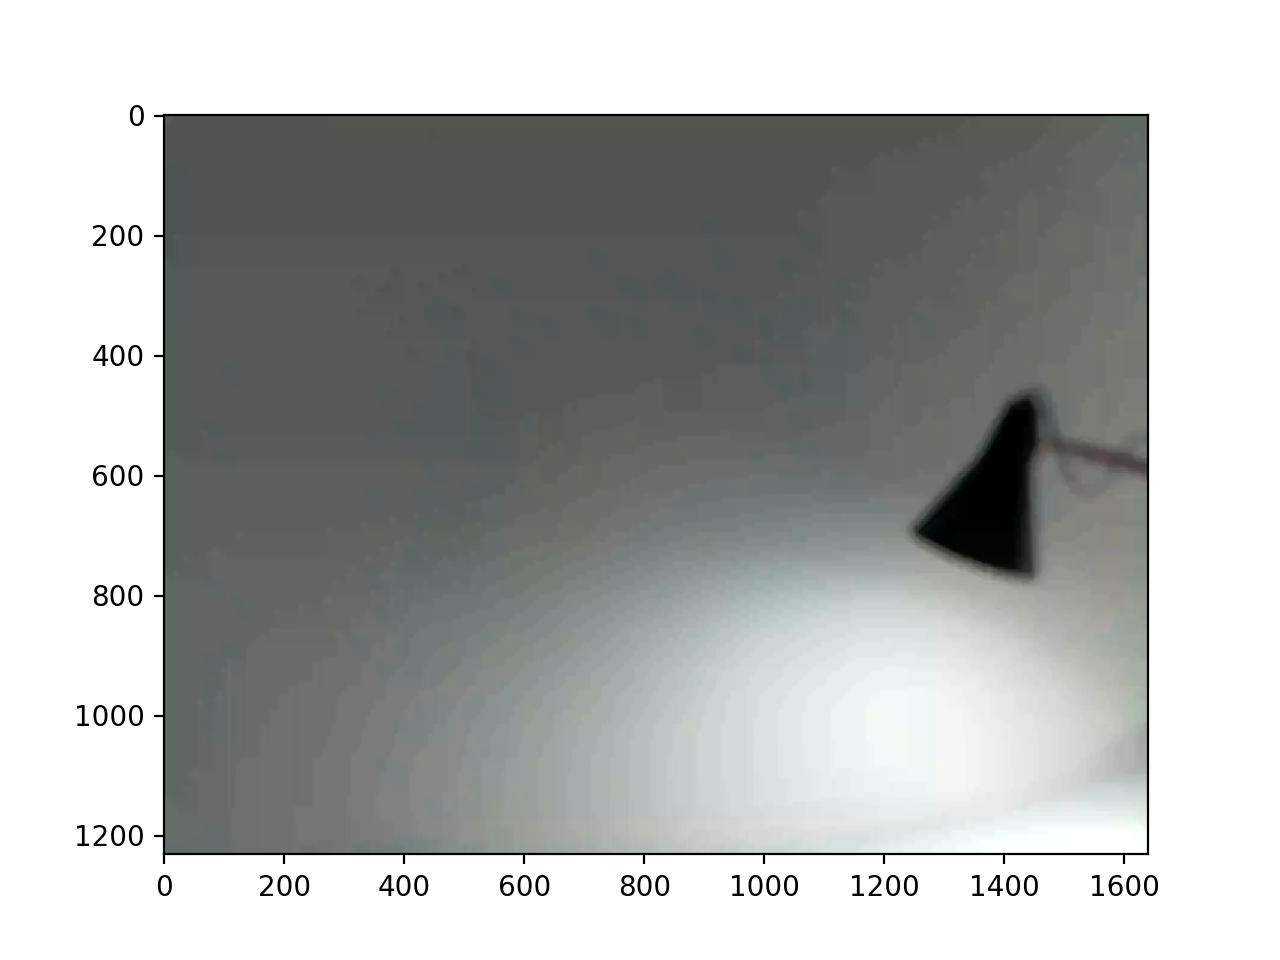

In [131]:

%matplotlib notebook

imgplot = plt.imshow(cFrame)

In [107]:
cap = cv2.VideoCapture("/Users/cad/Desktop/animalXvideo_20181009220651.h264")

In [108]:
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)
print("w={}, h={}, fps={}".format(width,height,fps))

w=1640, h=1232, fps=30.0


In [109]:
# count frames and get timestamps
aa=[]
bb=[]
count=0
while True:
    (grabbed, frame) = cap.read()
    if not grabbed:
        break
    aa.append(cap.get(cv2.CAP_PROP_POS_MSEC))
    bb.append(np.mean(frame[417:503,856:912]))
    count+=1

In [110]:
aa[0]

33.333333333333336

<IPython.core.display.Javascript object>


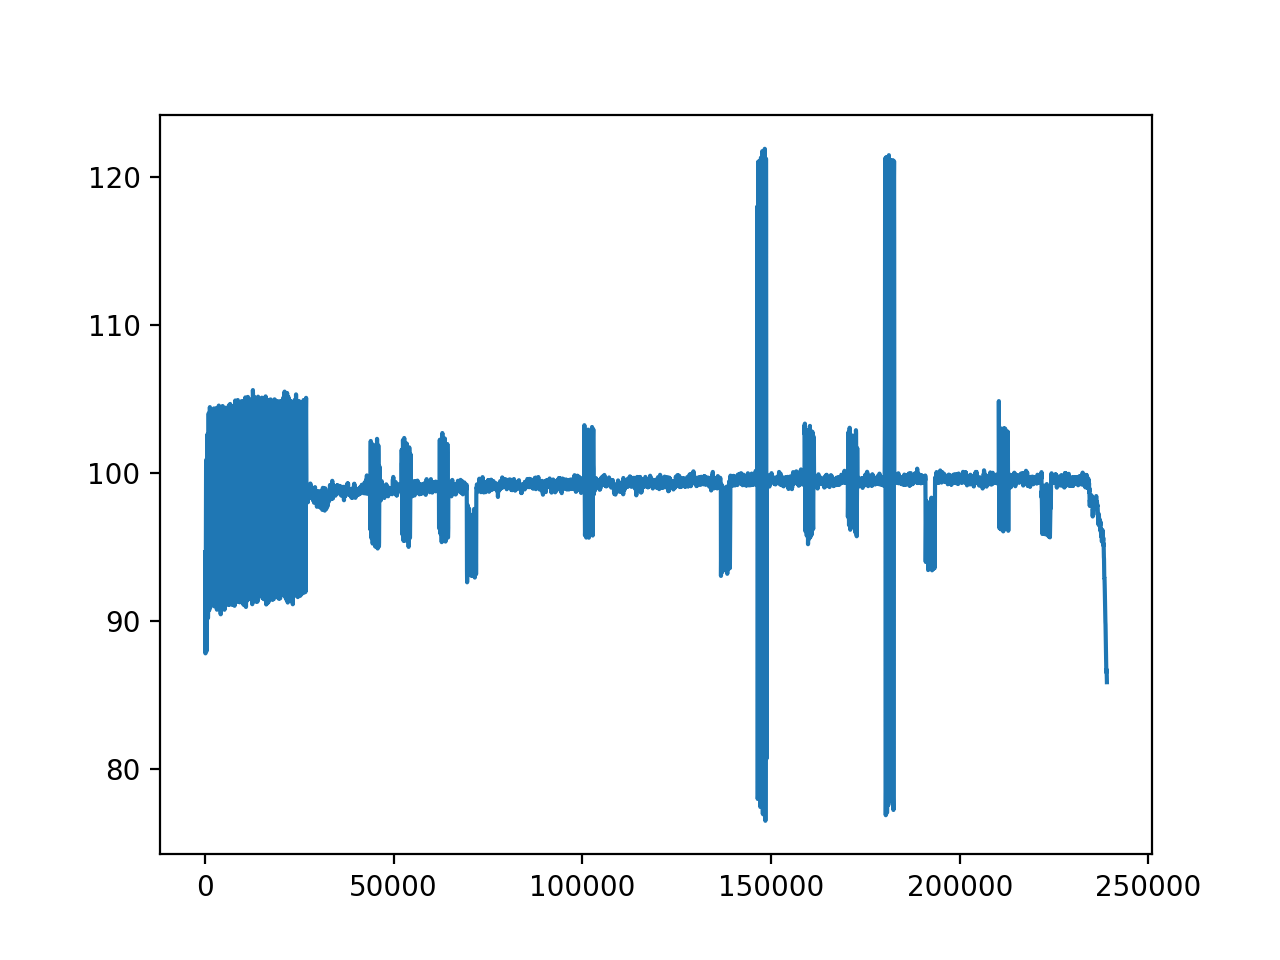

In [111]:
#sns.set()
%matplotlib notebook
imFig=plt.figure()
imMeanPlot=plt.plot(aa,bb)

In [112]:
import os
import ipywidgets as widgets
import h5py

In [113]:
class FileBrowser(object):
    def __init__(self):
        self.path = os.getcwd()
        self._update_files()
        
    def _update_files(self):
        self.files = list()
        self.dirs = list()
        if(os.path.isdir(self.path)):
            for f in os.listdir(self.path):
                ff = self.path + "/" + f
                if os.path.isdir(ff):
                    self.dirs.append(f)
                else:
                    self.files.append(f)
        
    def widget(self):
        box = widgets.VBox()
        self._update(box)
        return box
    
    def _update(self, box):
        
        def on_click(b):
            if b.description == '..':
                self.path = os.path.split(self.path)[0]
            else:
                self.path = self.path + "/" + b.description
            self._update_files()
            self._update(box)
        
        buttons = []
        if self.files:
            button = widgets.Button(description='..', background_color='#d0d0ff')
            button.on_click(on_click)
            buttons.append(button)
        for f in self.dirs:
            button = widgets.Button(description=f, background_color='#d0d0ff')
            button.on_click(on_click)
            buttons.append(button)
        for f in self.files:
            button = widgets.Button(description=f)
            button.on_click(on_click)
            buttons.append(button)
        box.children = tuple([widgets.HTML("<h2>%s</h2>" % (self.path,))] + buttons)

# example usage:
#   f = FileBrowser()
#   f.widget()
#   <interact with widget, select a path>
# in a separate cell:
#   f.path # returns the selected path

# via "DrDub" https://gist.github.com/DrDub/6efba6e522302e43d055

In [114]:
f = FileBrowser()
f.widget()

In [115]:
f.path

'/Users/cad/Desktop/cad/cad1_ses13_behav_20181009220718.hdf'

In [116]:
csH5 = h5py.File(f.path, 'r')
cskeys=list(csH5.keys())
csdset=csH5[cskeys[0]]
csdims=csdset.shape

In [117]:
from matplotlib import pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


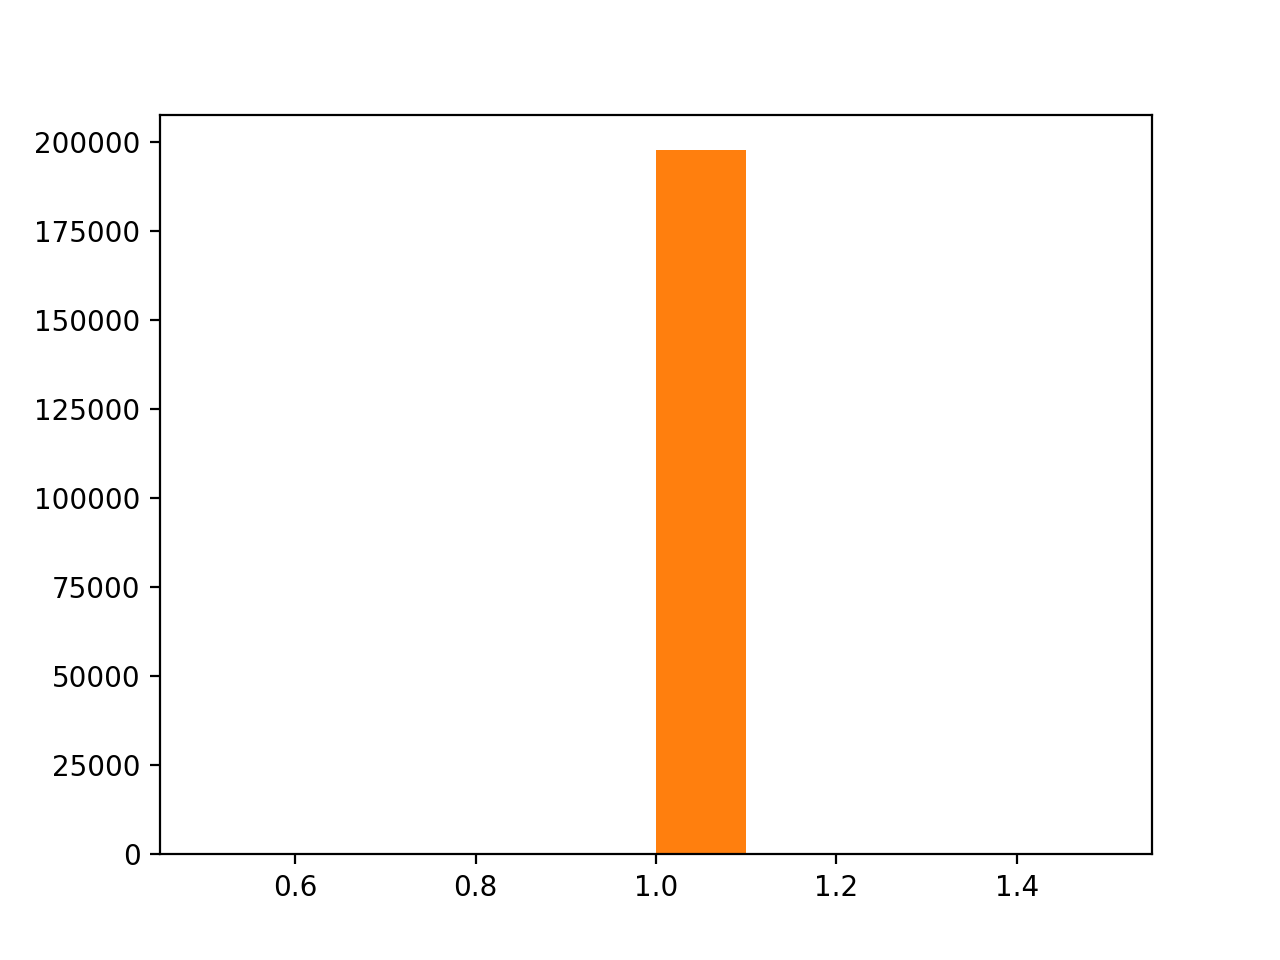

In [118]:
tp=plt.figure()
plt.hist(np.diff(csdset[:,0]))
plt.hist(np.diff(csdset[:,1]))
plt.show(tp)

In [119]:
aa[1]

66.66666666666667

<IPython.core.display.Javascript object>


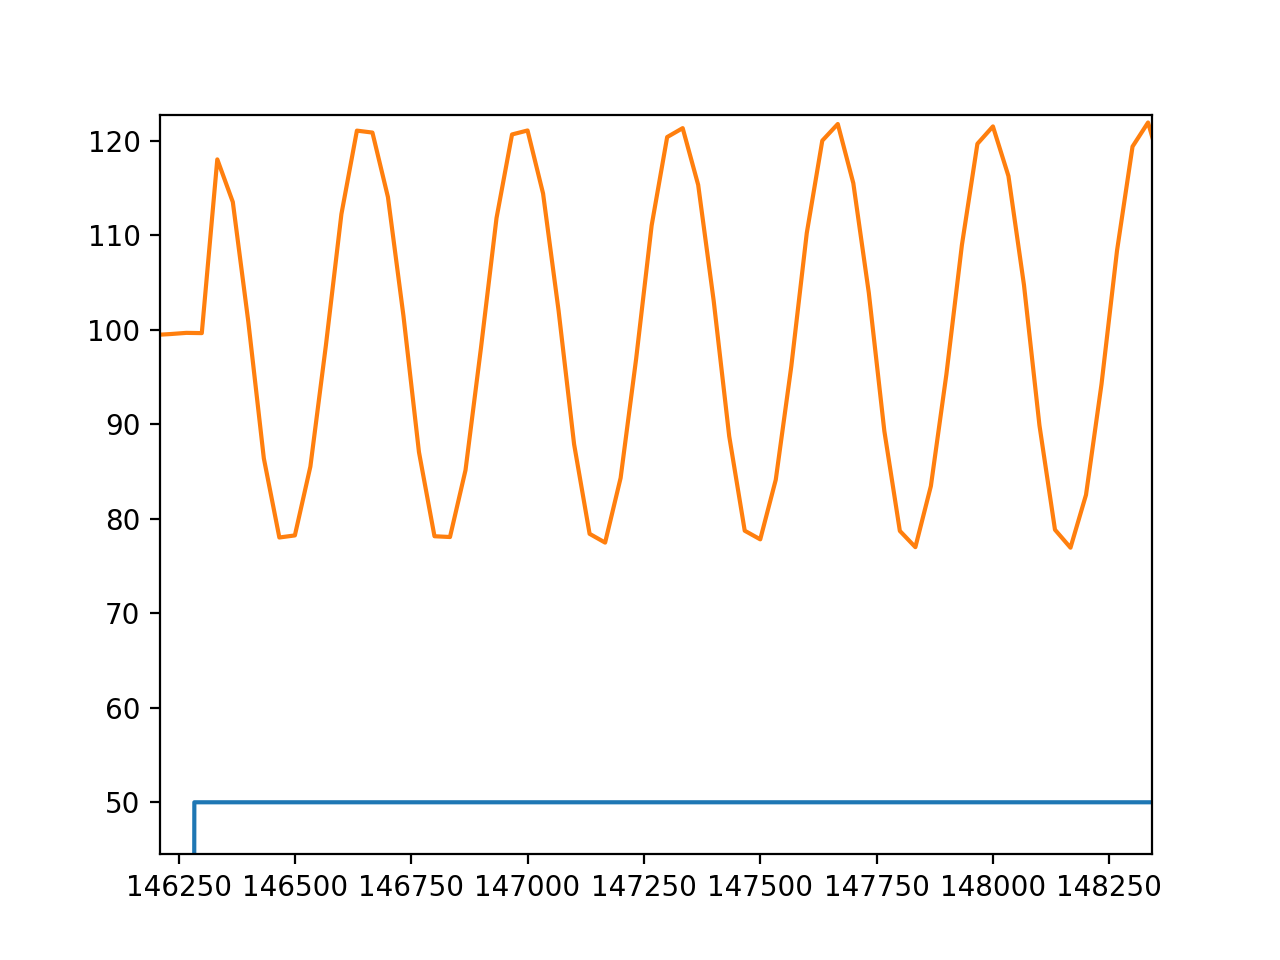

In [125]:
tp=plt.figure()
aPlot=plt.plot(csdset[:,0]+26901,csdset[:,3]*25)
bPlot=plt.plot(aa,bb)
plt.show()